## K-NN REGRESSION BRUTE-FORCE IMPLEMENTATION

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class KNN_Regression():
    '''
     Brute-Force KNN Regression with Euclidian distance
    '''
    def __init__(self, n_neighbors=2):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        X = np.array(X)
        self.norms = np.linalg.norm(X, axis=0)

        self.X = X / self.norms
        self.y = np.array(y)

    def _get_distances(self, x_q, X):
        '''Euclidian distance'''
        return np.sqrt(np.sum((X - x_q) ** 2, axis=1))

    def _get_k_nearest_neighbors_indicies(self, x_q, X, k):
        dists = self._get_distances(x_q, X)
        return np.argsort(dists)[0:k]

    def predict(self, X_q):
        predictions = list()
        X_q = np.array(X_q) / self.norms
        for x_q in X_q:
            nearest_ngh_indicies = self._get_k_nearest_neighbors_indicies(x_q, self.X, self.n_neighbors)
            predictions.append(np.mean(self.y[nearest_ngh_indicies]))

        return predictions


def calculate_MSE(y, y_pred):
    '''Mean Squared Error'''
    return np.mean((y - y_pred) ** 2)


## LOAD AND PREPARE DATA

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales_data = pd.read_csv("../data/house_data.csv", dtype=dtype_dict)
train = sales_data.sample(frac=0.8, random_state=0) 
test_valid = sales_data.drop(train.index)
valid = test_valid.sample(frac=0.5, random_state=5)
test = test_valid.drop(valid.index)


In [4]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
target = "price"

In [5]:
X_train = np.array(train[feature_list])
y_train = np.array(train[target])
X_valid = np.array(valid[feature_list])
y_valid = np.array(valid[target])
X_test = np.array(test[feature_list])
y_test = np.array(test[target])

## TEST KNN REGRESSION

In [6]:
knn_reg_custom = KNN_Regression(n_neighbors=2)
knn_reg_custom.fit(X_train, y_train)

In [7]:
predicted = knn_reg_custom.predict(X_test)

In [8]:
print("RMSE on TEST k=2:", np.sqrt(calculate_MSE(y_test, predicted)))

RMSE on TEST k=2: 221947.5316945931


## CHOSE THE BEST K VALUE

In [9]:
rmse_all = list()
for k in range(1, 16):
    # Train with different n_neighbors
    knn_reg_custom = KNN_Regression(n_neighbors=k)
    knn_reg_custom.fit(X_train, y_train)
    
    predict = knn_reg_custom.predict(X_valid)
    
    RMSE = np.sqrt(calculate_MSE(y_valid, predict))
    rmse_all.append(RMSE)

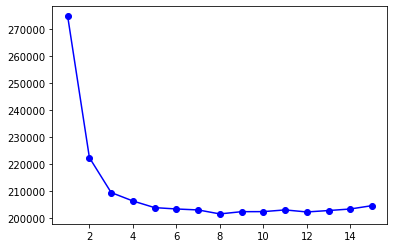

In [10]:
import matplotlib.pyplot as plt

kvals = range(1, 16)
plt.plot(kvals, rmse_all,'bo-')

### CHECK RMSE WITH NEW K VALUE ON TEST DATA

In [11]:
knn_reg_custom = KNN_Regression(n_neighbors=8)
knn_reg_custom.fit(X_train, y_train)
predicted = knn_reg_custom.predict(X_test)
print("RMSE on TEST Custom KNN Regression k=8:", np.sqrt(calculate_MSE(y_test, predicted)))

RMSE on TEST Custom KNN Regression k=8: 203869.20899738907


### Compare with sklearn

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knn_reg_sklearn = KNeighborsRegressor(n_neighbors=8, algorithm="brute", metric="euclidean")
knn_reg_sklearn.fit(X_train, y_train)
print("RMSE on TEST SKLearn Implementation k=8:", np.sqrt(calculate_MSE(y_test, knn_reg_sklearn.predict(X_test))))
## Looks like sklearn even with algorithm="brute" uses some kind of approximate search

RMSE on TEST SKLearn Implementation k=8: 239686.77747041627


## PLOT TRUE FIT VS PREDICTED FIT

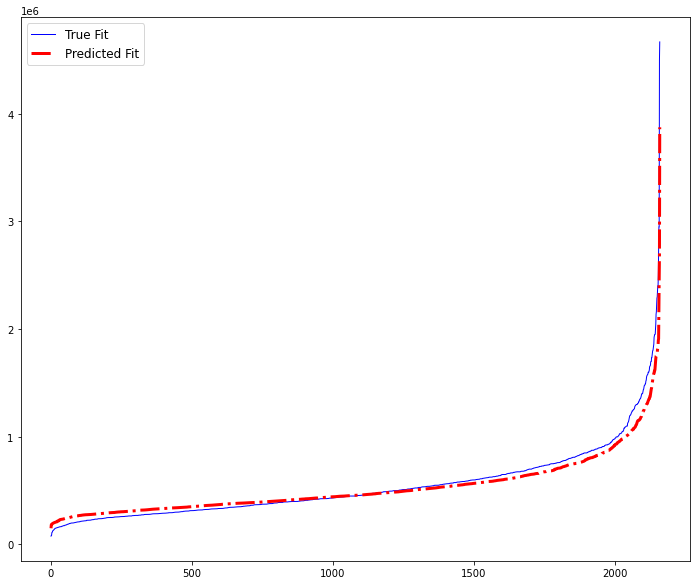

In [14]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(y_test)), np.sort(y_test), "b-", label="True Fit", linewidth=1)
plt.plot(range(len(predicted)), np.sort(predicted), "r-.", label="Predicted Fit",linewidth=3)
plt.legend(prop={"size":12})